# Week 3 Lecture 2b:More on sorting

In [2]:
%run "boaz_utils.ipynb"

## Time complexity review

__Algorithm:__ A receipe for instructions how to compute __output__ from __input__

__Program:__ Coding up the algorithm in a __programming language__

__Running Time:__ Depends on __algorithm__, __language__, __computer__

If __input is longer__  program is __slower__.

__O notation:__ By how much slower? Ignore __programming language__ and __computer__, focus on the __algorithm__

In [3]:
def f(L):
    x = 0
    for i in range(len(L)):
        if L[i]> 100:
            x += L[i]
    return x

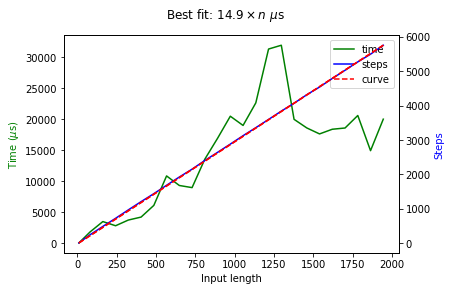

In [4]:
timer(f,genintlist(2000));

In [30]:
def g(L):
    x = 0
    for i in range(len(L)):
        for j in range(len(L)):
            x += L[i]-L[j]
    return x
g([243,45,90,23,54,758])

0

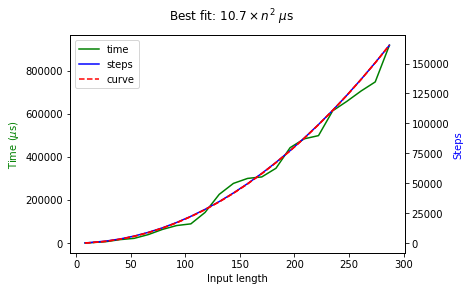

In [6]:
timer(g,genintlist(300));

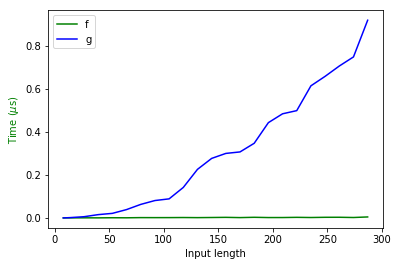

In [7]:
compare_times(f,g,genintlist(300));

In [8]:
def h(L):
    x = 0
    for i in range(len(L)):
        x += L[i]*L[i]*L[i]
        
    for j in range(len(L)):
        x -= L[j]*L[j]*L[j]
        
    for k in range(len(L)):
        x += L[k]*L[k]*L[k]
    return x

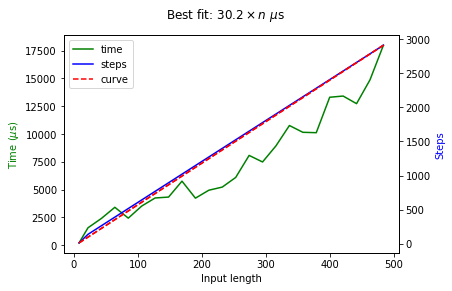

In [31]:
timer(h,genintlist(500));

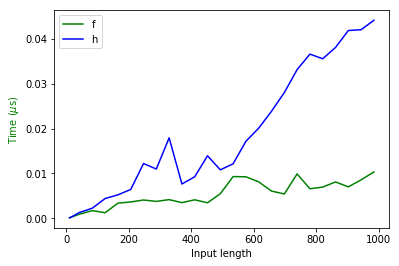

In [35]:
compare_times(f,h,genintlist(1000))

## Merge sort algorithm

In [11]:
def sort2(L):
    if L[0]>L[1]: return [L[1],L[0]]
    return L

__Component:__ `merge(L1,L2)` takes _two sorted lists_ and returns sorted list of both elements of `L1` and `L2`

In [12]:
def merge(L1,L2):
    if not L1: return L2
    if not L2: return L1
    if L1[0] < L2[0]: 
        return [L1[0]] + merge(L1[1:],L2)
    return [L2[0]] + merge(L1,L2[1:])

In [36]:
merge([2,100,300],[5,150])

[2, 5, 100, 150, 300]

__Q:__ Suppose you are given `sort2` and `merge`. Write `sort4` that makes _two_ calls to `sort2`, _one_ call to `merge` and no comparisons by itself.

In [39]:
def sort4(L):
    L1 = sort2(L[:2])
    L2 = sort2(L[2:])
    return merge(L1,L2)
def mystery(L):
    L1 = sort4(L[:4])
    L2 = sort4(L[4:])
    return merge(L1,L2)
mystery([8,7,6,5,4,3,2,1])

[1, 2, 3, 4, 5, 6, 7, 8]

Selection sort does following on a list of size $n$:<br>
1) Find minimum element and put it at the beginning.<br>
2) Sort the last  $n-1$ elements. 

__Merge sort__ does following on list of size $n$: <br>
1) Sort first $n/2$ elements to get list `L1` and  last $n/2$ elements to get  list `L2`.<br>
2) _Merge_ `L1` and `L2` together to one sorted list.

__Question:__ Give a function `merge (L1,L2)` that _merges_ two sorted lists

In [51]:
def merge(L1,L2):
    result = []
    while (L1 and L2):
        if L1[0]<L2[0]:
            result += [L1[0]]
            L1 = L1[1:] # assume it's O(1) - some issues
        else:
            result += [L2[0]]
            L2 = L2[1:]
    if L1: result += L1
    if L2: result += L2
    return result

merge([1,10,100],[5,55])

[1, 5, 10, 55, 100]

In [52]:
def merge(L1,L2):
    result = [0]*(len(L1)+len(L2))
    i = 0 
    j = 0
    k = 0
    while (i < len(L1) and j <len(L2)):
        if L1[i] < L2[j]:
            result[k] = L1[i]
            i += 1
        else:
            result[k] = L2[j]
            j += 1
        k += 1
    if i < len(L1):
        for t in range(i,len(L1)):
            result[k+t] = L1[t]
    else:
        for t in range(j,len(L2)):
            result[j+t] = L2[t]
    return result
                
        

In [41]:
merge([2,5,11],[1,9,12,36])

[1, 2, 5, 9, 11, 12, 36]

In [17]:
def mergesort(L):
    if len(L) <= 1: return L
    m = int(len(L)/2)
    L1 = mergesort(L[:m])
    L2 = mergesort(L[m:])
    return merge(L1,L2)

In [47]:
mergesort([random.randint(1,100) for n in range(10)])

[5, 14, 27, 32, 45, 65, 73, 78, 87, 98]

In [19]:
#This function returns the index of the minimum element in list L
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        if current_min > L[j]:
            current_min = L[j]
            current_index = j
    return current_index

def selectionsort(L):
    if len(L)<=1:   
        return L # a one-element list is always sorted
    min_idx = find_min_index(L) #non-recursive helper function
    L[0], L[min_idx] = L[min_idx], L[0] 
    return [L[0]] + selectionsort(L[1:len(L)])

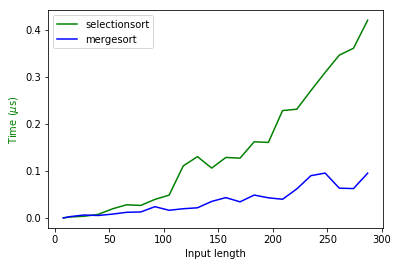

In [20]:
compare_times(selectionsort,mergesort, genintlist(300))

In [21]:
n = 16
selection = [ "*"*(n-i) for i in range(n)]
mergestars = []

def print_stars(n):
    global mergestars
    mergestars.append("*"*n)
    if n<= 1: 
        return
    print_stars(int(n/2))
    print_stars(int(n/2))

print_stars(n)
def selection_vs_merge_stars():
    global mergestars,n,selection
    for i in range(max(len(selection),len(mergestars))):
        s = ""
        if i < len(selection):
            s= selection[i]
        s += " "*(10+n-len(s))
        if i < len(mergestars):
            s += mergestars[i]
        print(s)

    

In [48]:
selection_vs_merge_stars()

****************          ****************
***************           ********
**************            ****
*************             **
************              *
***********               *
**********                **
*********                 *
********                  *
*******                   ****
******                    **
*****                     *
****                      *
***                       **
**                        *
*                         *
                          ********
                          ****
                          **
                          *
                          *
                          **
                          *
                          *
                          ****
                          **
                          *
                          *
                          **
                          *
                          *


## Analysis of running time 

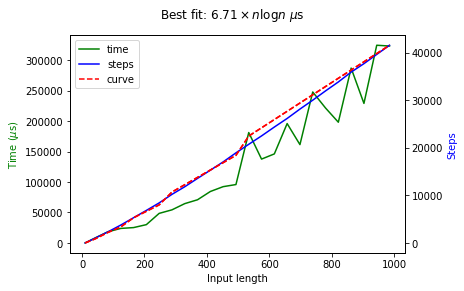

In [49]:
timer(mergesort,genintlist(1000));

If merging two lists of $n/2$ elements takes $n$ steps, time to sort $n$ elements is

$T(n) = 2T(n/2) + n$


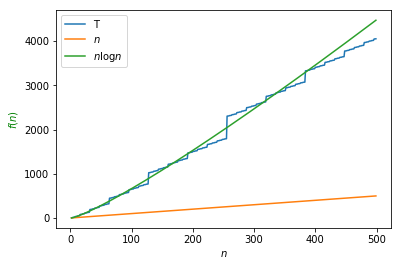

In [50]:
def T(n):
    if n <=1: return 1
    return 2*T(int(n/2))+n

plotfunctions(T,"T",lambda n: n, "$n$", lambda n: n*log(n), r"$n\log n$", n = 500)

__Claim:__ For $n\geq 2$, $T(n) \leq 2 n\log n$.<br>
__Proof:__ By induction <br>
$T(2) = 2T(1)+2 = 4 = 2\cdot 2 \cdot \log 2$ <br>
$T(n) = 2T(n/2) + n$<br>
$\leq 2\cdot 2(n/2)\log(n/2) + n$<br>
$= 2n(\log n - 1) + n \leq 2n\log n$

## Quicksort

__Algorithm Quicksort:__ Input `L` of length `n`.<br>
1) Pick random `j` in `[0,...,n-1]` <br>
2) Let `x=L[j]` and reorder `L` so that locations `L[0],..,L[i-1]` are smaller than `x` and locations `L[i],...,L[n-1]` are at least as large as `x`. <br>
3) Recursively sort `L[0],...,L[i-1]` and `L[i+1],...,L[n-1]`

In [25]:
def quicksort(L,beg=0,end= None ):
    if end==None: end = len(L)-1
    if end <= beg: return
    x = L[random.randint(beg,end)]
    i,j = partition(L,x,beg,end)
    quicksort(L,beg,i)
    quicksort(L,j,end)

In [26]:
def partition(L,x,beg,end):
    i = beg
    j = end
    while i<j:
        if L[i]<x: i+= 1
        elif L[j]>= x: j -= 1
        else: L[i],L[j]=L[j],L[i]
    while j<= end and L[j]<=x: j+=1
    return i-1,j

In [27]:
L = [random.randint(0,600) for n in range(300)]
quicksort(L)
L[:10]

[1, 3, 8, 9, 12, 13, 16, 16, 18, 20]

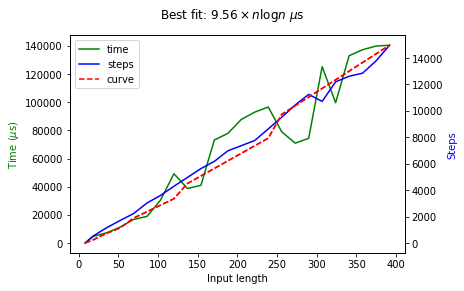

In [28]:
timer(lambda L:quicksort(L),genintlist(400));

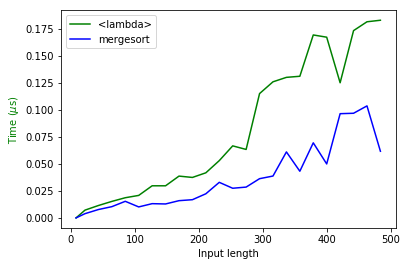

In [29]:
compare_times(lambda L: quicksort(L),mergesort, genintlist(500))

Quick sort is not necessarily faster than mergesort but the main advantage is that it sorts __in place__

[Sorting demo by Justin Johnson](http://cs.stanford.edu/people/jcjohns/sorting.js/)